# PBI en el Peru 
Como sabemos el Producto Bruto Interno (PBI) es el principal indicador de la economia, donde un aumento positivo, significa que la economia esta funcionando bien y esto conlleva a abrir mas puestos laborales y prosperidad a las familias de muchos peruanos. Es por ello que es importante realizar el analisis respectivo. 

## Uso de API del BCRPData
La estructura de la consulta se realiza de la siguiente forma: 

(https://estadisticas.bcrp.gob.pe/estadisticas/series/api/*códigos de series*/*formato de salida*/*periodo inicial*/*periodo final*/*idioma*)


In [2]:
# Establecemos el formato que nos indica en la pagina del BRCP

url = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
codigo_series = 'PN01770AM' # Codigo de Serie "Producto bruto interno y demanda interna (índice 2007=100) - PBI"
formato = '/json'
periodos = '/2005-1/2022-12'

url_comp = url + codigo_series + formato + periodos
print(url_comp)

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01770AM/json/2005-1/2022-12


In [3]:
# Importamos la libreria requests para poder realizar la solicitud/peticion de la data a la URL ya especificada
import requests
response = requests.get(url_comp)
print(response)


<Response [200]>


In [4]:
# Pasamos nuesta respuesta a formato json
response_json = response.json()
response_json

{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)',
  'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI',
    'dec': '1'}]},
 'periods': [{'name': 'Ene.2005', 'values': ['79.9791610934839']},
  {'name': 'Feb.2005', 'values': ['80.1344599066734']},
  {'name': 'Mar.2005', 'values': ['81.3964129865707']},
  {'name': 'Abr.2005', 'values': ['87.0734470255748']},
  {'name': 'May.2005', 'values': ['92.1414551036507']},
  {'name': 'Jun.2005', 'values': ['88.4557729993011']},
  {'name': 'Jul.2005', 'values': ['87.2766006292957']},
  {'name': 'Ago.2005', 'values': ['82.9894831129745']},
  {'name': 'Sep.2005', 'values': ['82.0878665294671']},
  {'name': 'Oct.2005', 'values': ['84.8027239326644']},
  {'name': 'Nov.2005', 'values': ['90.4951176179881']},
  {'name': 'Dic.2005', 'values': ['91.5459266918293']},
  {'name': 'Ene.2006', 'values': ['85.6590424919578']},
  {'name': 'Feb.2006', 'values': ['84.6285220854951']},
  {'name': 'M

In [5]:
# Separamos los items que nos arroja nuestra variable *'response_json'* 
# para poder saber como esta estructurado 

for key, value in response_json.items():
    print(key + ':', value)

config: {'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI', 'dec': '1'}]}
periods: [{'name': 'Ene.2005', 'values': ['79.9791610934839']}, {'name': 'Feb.2005', 'values': ['80.1344599066734']}, {'name': 'Mar.2005', 'values': ['81.3964129865707']}, {'name': 'Abr.2005', 'values': ['87.0734470255748']}, {'name': 'May.2005', 'values': ['92.1414551036507']}, {'name': 'Jun.2005', 'values': ['88.4557729993011']}, {'name': 'Jul.2005', 'values': ['87.2766006292957']}, {'name': 'Ago.2005', 'values': ['82.9894831129745']}, {'name': 'Sep.2005', 'values': ['82.0878665294671']}, {'name': 'Oct.2005', 'values': ['84.8027239326644']}, {'name': 'Nov.2005', 'values': ['90.4951176179881']}, {'name': 'Dic.2005', 'values': ['91.5459266918293']}, {'name': 'Ene.2006', 'values': ['85.6590424919578']}, {'name': 'Feb.2006', 'values': ['84.6285220854951']}, {'name': 'Mar.2006', 'values': ['91.2286928400679']}

In [6]:
for i in range(5):
    valores = response_json['periods'][i]["values"]
    print(type(valores))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [7]:
# Necesitamos obtener el valor del PBI a lo largo del periodo establecido
# Para ello extraemos los valores del diccionario y lo guardamos en una lista nueva
valor_pbi = []
for i in range(len(response_json['periods'])):
    val_list = response_json['periods'][i]["values"]
    valor_pbi.extend(float(valor) for valor in val_list)

In [8]:
print(valor_pbi)

[79.9791610934839, 80.1344599066734, 81.3964129865707, 87.0734470255748, 92.1414551036507, 88.4557729993011, 87.2766006292957, 82.9894831129745, 82.0878665294671, 84.8027239326644, 90.4951176179881, 91.5459266918293, 85.6590424919578, 84.6285220854951, 91.2286928400679, 91.7780023638019, 97.7619063414799, 95.072899809632, 92.9616001230902, 91.5547627296281, 88.769329600051, 92.1822066698177, 94.7874212319493, 99.4183587606666, 89.9525619891583, 88.6681022105582, 96.7214346263447, 96.6364193147801, 104.746678845017, 101.254568601752, 102.545139242961, 100.128668441286, 100.240420653565, 103.151330807994, 104.09969689671, 111.854978369874, 98.5070312090955, 100.672159768895, 104.083131031768, 110.233179015429, 112.075729562747, 112.166659126852, 112.297861122773, 108.887385132012, 110.738317611327, 111.65231586614, 110.655053597918, 117.46015281545, 102.953128300011, 101.029868827067, 107.149815903009, 108.842531811151, 114.214279327539, 108.963968421383, 110.735969953804, 109.8514222039

In [9]:
# Ahora tenemos que hacer lo mismo para las fechas
list_fechas = []
for i in range(len(response_json['periods'])):
    fechas = (response_json['periods'][i]['name'])
    list_fechas.append(fechas)

In [10]:
print(list_fechas)

['Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov.2009', 'Dic.2009', 'Ene.2010', 'Feb.2010', 'Mar.2010', 'Abr.2010', 'May.2010', 'Jun.2010', 'Jul.2010', 'Ago.2010', 'Sep.2010', 'Oct.2010', 'Nov.2010', 'Dic.2010', 'Ene.2011', 'Feb.2011', 'Mar.2011', 'Abr.2011', 'May.2011', 'Jun.2011', 'Jul.2011', 'Ago.2011', 'Sep.2011', 'Oct.2011', 'Nov.2011', 'Di

## Creacion de DataFrame 

In [14]:
import pandas as pd
# Creamos nuestro diccionario con los indices 'Fechas' y 'Valores'
dic = {'Fechas': list_fechas, 'Valores': valor_pbi}
print(dic)

{'Fechas': ['Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov.2009', 'Dic.2009', 'Ene.2010', 'Feb.2010', 'Mar.2010', 'Abr.2010', 'May.2010', 'Jun.2010', 'Jul.2010', 'Ago.2010', 'Sep.2010', 'Oct.2010', 'Nov.2010', 'Dic.2010', 'Ene.2011', 'Feb.2011', 'Mar.2011', 'Abr.2011', 'May.2011', 'Jun.2011', 'Jul.2011', 'Ago.2011', 'Sep.2011', 'Oct.2011', 'Nov

In [15]:
# Convertimos nuestro diccionario a un DataFrame
df = pd.DataFrame(dic)
df

,Fechas,Valores
0,Ene.2005,79.979161
1,Feb.2005,80.134460
2,Mar.2005,81.396413
3,Abr.2005,87.073447
4,May.2005,92.141455
...,...,...
211,Ago.2022,178.999259
212,Sep.2022,182.333589
213,Oct.2022,182.903399
214,Nov.2022,180.587594


Text(0.5, 1.0, 'Distribucion del PBI')

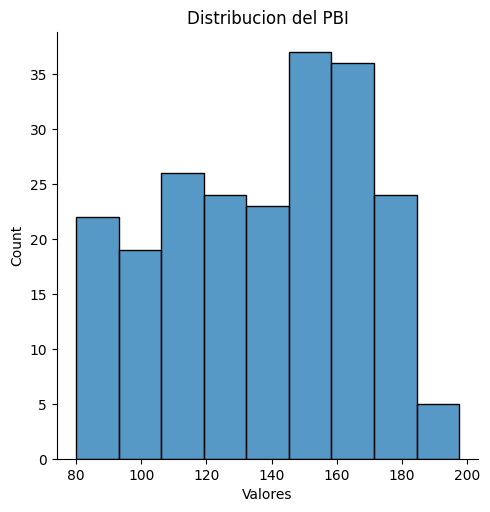

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['Valores'])
plt.title('Distribucion del PBI')


<Axes: >

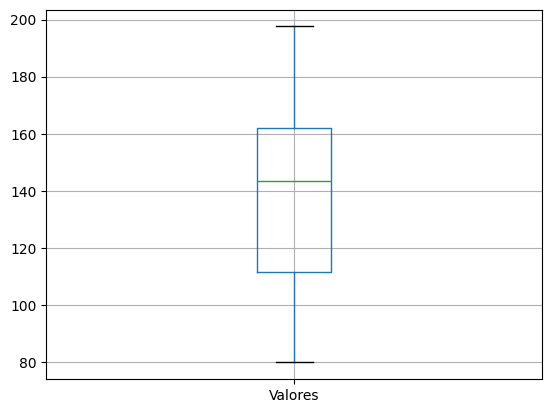

In [17]:
df.boxplot('Valores')

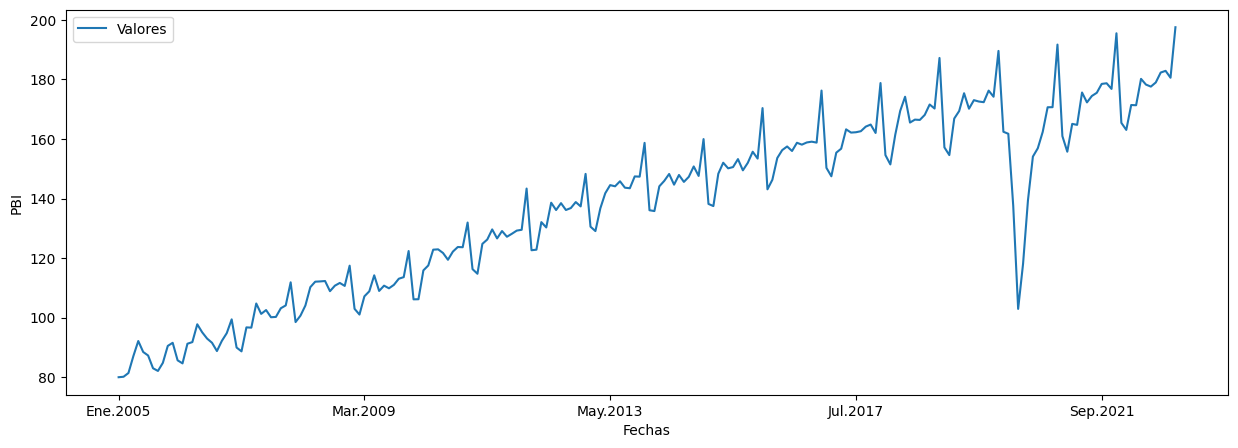

In [18]:
df.plot(x='Fechas', y = 'Valores', figsize=(15,5), kind='line')
plt.xlabel('Fechas')
plt.ylabel('PBI')
plt.show()